In [1]:
import pandas as pd

In [2]:
import random

<div style="font-family: Georgia; text-align: justify;">
    
### Simulating a random variable - sum of values on faces of 2 die rolled
    
</div>

In [3]:
# Repeating the same experiment 10000 times

L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [7]:
# Calculating the freqeuncy of each die roll sum i.e. each element in the sample space (Using this to calculate probabilities)

s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [8]:
s

2     0.0256
3     0.0543
4     0.0862
5     0.1113
6     0.1428
7     0.1699
8     0.1358
9     0.1073
10    0.0806
11    0.0559
12    0.0303
dtype: float64

In [9]:
import numpy as np
np.cumsum(s)

2     0.0256
3     0.0799
4     0.1661
5     0.2774
6     0.4202
7     0.5901
8     0.7259
9     0.8332
10    0.9138
11    0.9697
12    1.0000
dtype: float64

<Axes: >

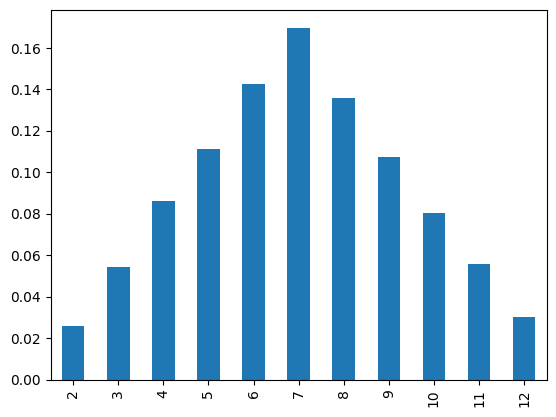

In [10]:
# Plotting a bar chart to show the Probability Mass Function of the given r.v.
# (You can kinda seee, that it looks like a Normal/Gaussian distribution)

s.plot(kind='bar')

<Axes: >

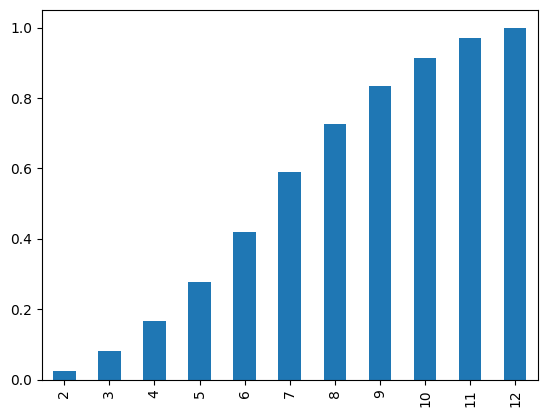

In [11]:
# Plotting a bar chart to show the Cumulative Density Frunction of the given r.v.

np.cumsum(s).plot(kind='bar')

<div style="font-family: Georgia; text-align: justify;">
    
# Parametric Density estimation
    
</div>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

# 
sample = normal(loc=50, scale=5,size=1000)

In [13]:
sample.mean()

50.108995152380636

(array([  4.,  11.,  75., 183., 262., 241., 143.,  66.,  14.,   1.]),
 array([32.31943334, 35.94531255, 39.57119176, 43.19707097, 46.82295017,
        50.44882938, 54.07470859, 57.7005878 , 61.326467  , 64.95234621,
        68.57822542]),
 <BarContainer object of 10 artists>)

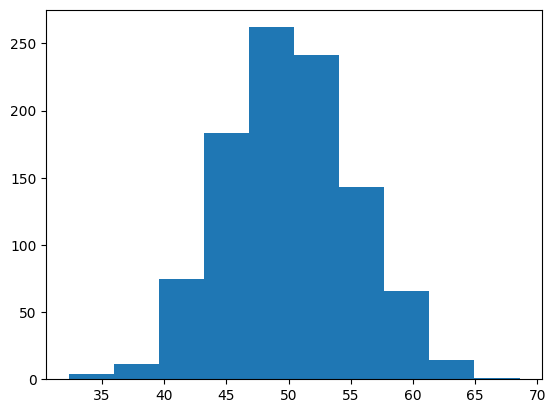

In [14]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [15]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [16]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [17]:
values = np.linspace(sample.min(),sample.max(),100)

In [18]:
sample.max()

68.57822542042962

In [19]:
probabilities = [dist.pdf(value) for value in values]

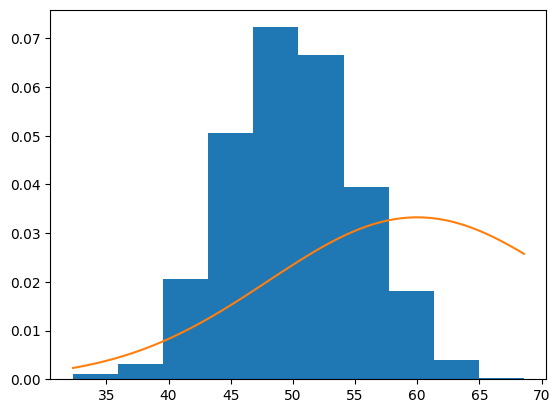

In [20]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\bhagy\AppData\Local\Temp\ipykernel_19032\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

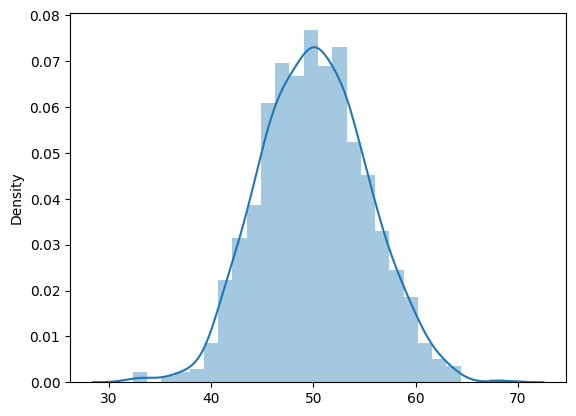

In [21]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [22]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [23]:
sample

array([11.20923818, 22.07310487,  9.18034524, 15.58377032, 19.16632673,
       19.68522131, 18.0867066 , 21.86162948, 19.39383856, 25.55969178,
       17.77789808, 30.24222451, 19.95674332, 18.19449043, 22.37090951,
       23.27513397, 14.63527766, 15.05351175, 27.79336299, 20.6085286 ,
       25.16642504, 23.6333446 , 20.92583823, 20.34556184, 18.62282533,
       20.63633471, 32.78172834, 24.44169432, 24.33924769, 20.90601846,
       29.74562536, 20.41946412, 23.52497192, 16.67550319, 13.49947722,
       14.06589903, 19.50618694, 20.63444582, 14.80163994, 19.88315297,
       23.84939916,  9.76946294, 21.12484469, 22.74925946, 16.24293233,
       18.33866581, 23.96767529, 27.74323776, 13.91623453, 33.40982131,
       16.00217905, 25.64397352, 13.67295648, 17.71137519, 15.94562033,
       18.2383527 , 18.36401392, 15.65645859, 19.87476547, 22.60179461,
       19.75979249, 23.20835318, 27.72483427, 21.67292198,  9.26853865,
       22.61897347, 26.10413499, 13.14699036, 17.62091278, 14.35

(array([ 2.,  2.,  4.,  3.,  4.,  3., 10., 12., 12., 15., 22., 26., 17.,
        35., 22., 20., 26., 25.,  7.,  9., 10., 14.,  6., 13., 10., 12.,
        26., 32., 39., 46., 44., 42., 55., 57., 55., 51., 47., 40., 30.,
        25., 22., 22.,  5., 10.,  3.,  3.,  2.,  1.,  1.,  1.]),
 array([ 6.40954268,  7.41277693,  8.41601118,  9.41924544, 10.42247969,
        11.42571394, 12.42894819, 13.43218244, 14.43541669, 15.43865094,
        16.44188519, 17.44511944, 18.44835369, 19.45158794, 20.45482219,
        21.45805645, 22.4612907 , 23.46452495, 24.4677592 , 25.47099345,
        26.4742277 , 27.47746195, 28.4806962 , 29.48393045, 30.4871647 ,
        31.49039895, 32.4936332 , 33.49686746, 34.50010171, 35.50333596,
        36.50657021, 37.50980446, 38.51303871, 39.51627296, 40.51950721,
        41.52274146, 42.52597571, 43.52920996, 44.53244422, 45.53567847,
        46.53891272, 47.54214697, 48.54538122, 49.54861547, 50.55184972,
        51.55508397, 52.55831822, 53.56155247, 54.56478672,

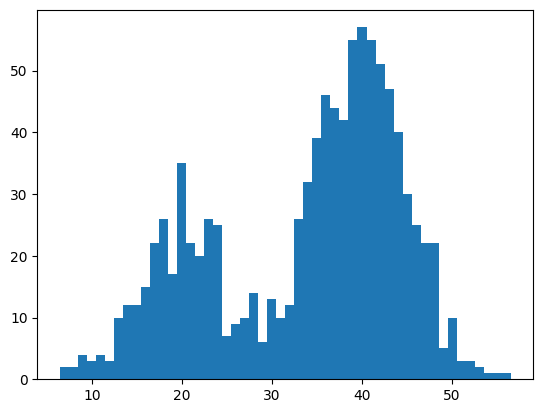

In [24]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [26]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [27]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [28]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

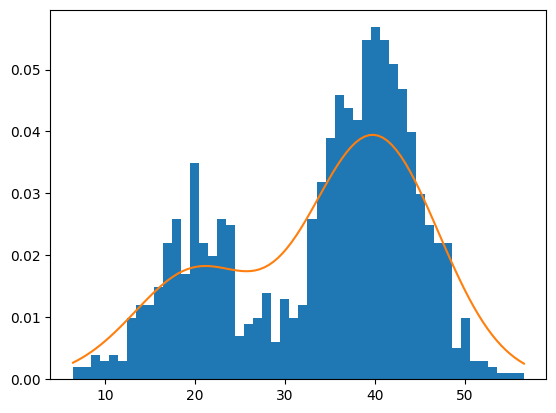

In [29]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

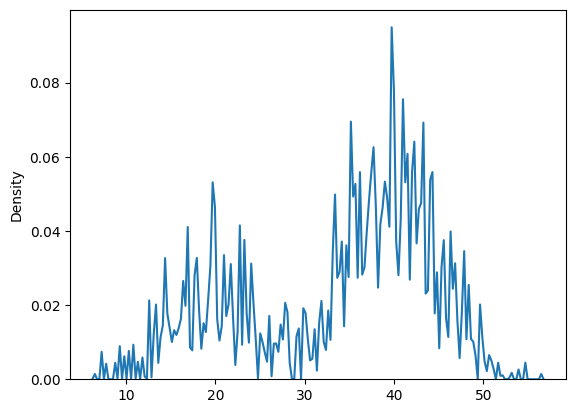

In [30]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [31]:
import seaborn as sns

In [32]:
df = sns.load_dataset('iris')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

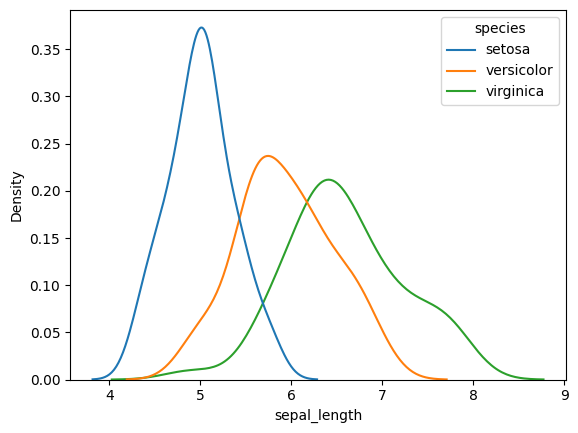

In [34]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

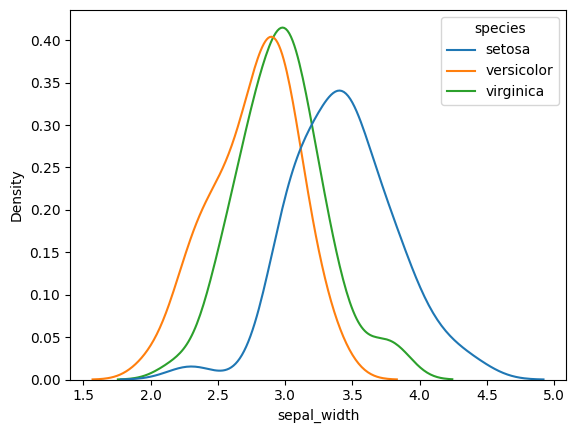

In [35]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

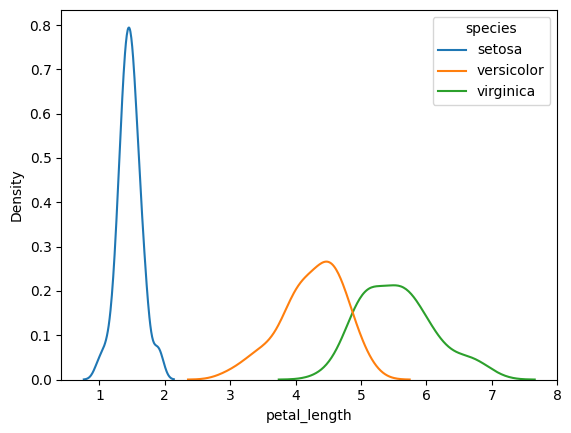

In [36]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

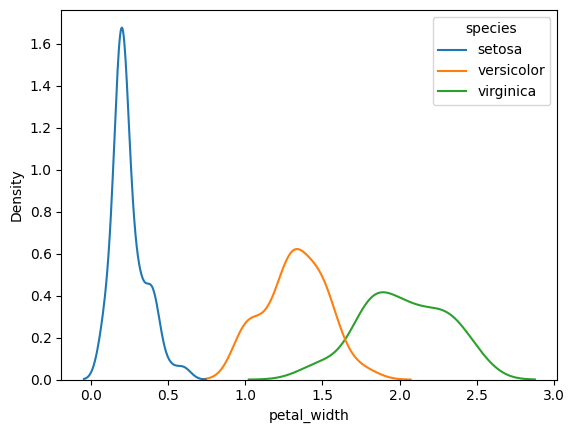

In [37]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [38]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [39]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

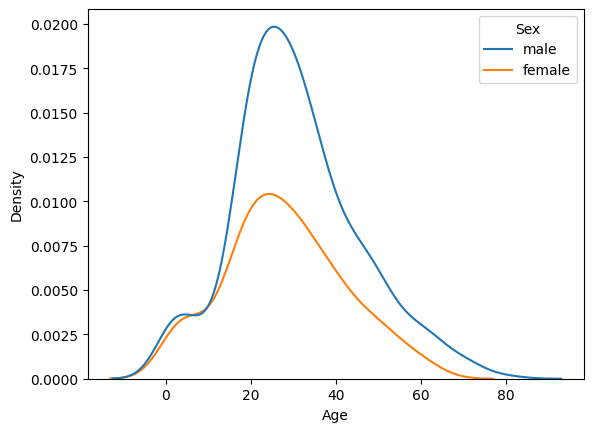

In [41]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

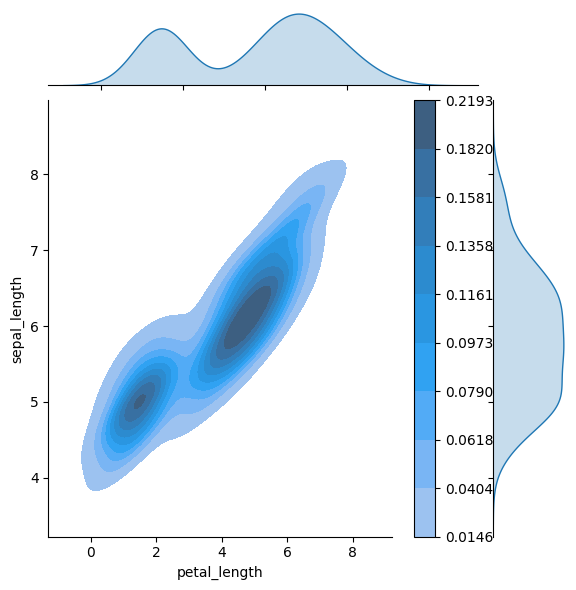

In [42]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

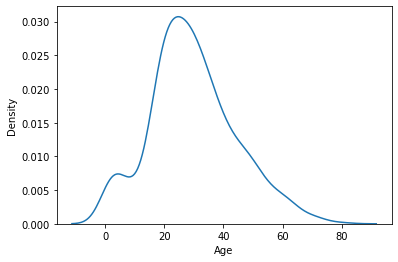

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

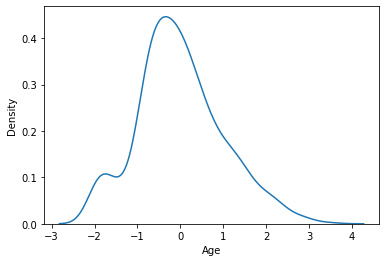

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0